In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, laplace

In [2]:
with open("31.txt",'r') as file1:
    temp = file1.readlines()
    for i in range(len(temp)):
        temp[i]=float(temp[i][:-1])
    norm_dist_1 = np.array(temp)

In [3]:
with open("34.txt",'r') as file1:
    temp = file1.readlines()
    for i in range(len(temp)):
        temp[i]=float(temp[i][:-1])
    norm_dist_2 = np.array(temp)

In [4]:
with open("33.txt",'r') as file1:
    temp = file1.readlines()
    for i in range(len(temp)):
        temp[i]=float(temp[i][:-1])
    exp_dist_1 = np.array(temp)

In [5]:
with open("36.txt",'r') as file1:
    temp = file1.readlines()
    for i in range(len(temp)):
        temp[i]=float(temp[i][:-1])
    exp_dist_2 = np.array(temp)

# Определим виды распределений для данных на основе критерия согласия Пирсона

## Рассмотрим первую выборку из нормальнораспределённой ГС

In [8]:
n_norm_1 = len(norm_dist_1)
m_norm_1 = int(np.round(1+3.332*np.log10(n_norm_1)))
h_norm_1 = (max(norm_dist_1)-min(norm_dist_1))/m_norm_1
print(n_norm_1,m_norm_1,h_norm_1)

32 6 6.891958506679113


In [9]:
edges_norm_1 = [[min(norm_dist_1)-0.01,min(norm_dist_1)-0.01+h_norm_1]]
for i in range(m_norm_1):
    edges_norm_1.append([edges_norm_1[i][1],edges_norm_1[i][1]+h_norm_1])
edges_norm_1 = np.round(np.array(edges_norm_1), 3)
print(edges_norm_1)

[[-32.226 -25.335]
 [-25.335 -18.443]
 [-18.443 -11.551]
 [-11.551  -4.659]
 [ -4.659   2.233]
 [  2.233   9.125]
 [  9.125  16.017]]


In [10]:
freq_abs_norm_1 = np.array([0]*(m_norm_1+1))
for i in norm_dist_1:
    for j in range(m_norm_1+1):
        if edges_norm_1[j][0]<=i<=edges_norm_1[j][1]:
            freq_abs_norm_1[j] += 1
freq_rel_norm_1 = np.array(freq_abs_norm_1 / sum(freq_abs_norm_1))
print(freq_abs_norm_1, freq_rel_norm_1)

[2 7 7 7 6 2 1] [0.0625  0.21875 0.21875 0.21875 0.1875  0.0625  0.03125]


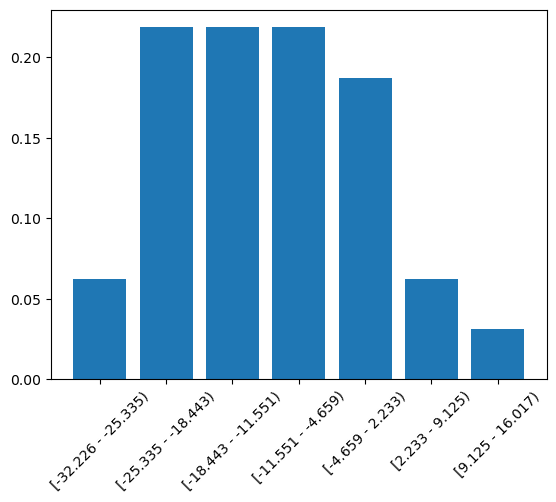

In [11]:
plt.bar([f'[{edges_norm_1[i][0]} - {edges_norm_1[i][1]})' for i in range(len(edges_norm_1))], height = freq_rel_norm_1)
plt.xticks(rotation=45)
plt.show()

## Проверим на нормальность

In [13]:
p = [0]*(m_norm_1+1)

In [14]:
for i in range(m_norm_1+1):
    p[i] = laplace.cdf((edges_norm_1[i][1]-np.mean(norm_dist_1))/np.std(norm_dist_1, ddof = 1)) - \
    laplace.cdf((edges_norm_1[i][0]-np.mean(norm_dist_1))/np.std(norm_dist_1, ddof = 1))

In [15]:
p = np.array(p)
n_teor = p*n_norm_1
print(n_teor)

[2.00316655 3.88836717 7.54697756 7.95974639 4.10721394 2.11612605
 1.09027422]


In [16]:
chi2_1 = 0
for i in range(m_norm_1 + 1):
    chi2_1 += (freq_abs_norm_1[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_norm_1 - 2 - 1), chi2_1)
if(chi2.ppf(1-0.05, m_norm_1 - 2 - 1) > chi2_1 and chi2_1 > 0):
    print('Принимаем нулевую гипотезу. Данные распределены нормально')
else:
    print('Отвергаем нулевую гипотезу. Данные не распределены нормально')

7.814727903251179 3.531554058382461
Принимаем нулевую гипотезу. Данные распределены нормально


## Проверим на показательное распределение

In [18]:
p = [0]*(m_norm_1+1)
lamb = 1/np.mean(norm_dist_1)
for i in range(m_norm_1+1):
    p[i] = np.exp(-lamb*edges_norm_1[i][0]) - np.exp(-lamb*edges_norm_1[i][1])
p = np.array(p)
n_teor = p*n_norm_1
print(n_teor, p)

[ -1.5451694   -2.84899239  -5.25243616  -9.6834536  -17.85252991
 -32.91313589 -60.6790477 ] [-0.04828654 -0.08903101 -0.16413863 -0.30260793 -0.55789156 -1.0285355
 -1.89622024]


In [19]:
chi2_1 = 0
for i in range(m_norm_1 + 1):
    chi2_1 += (freq_abs_norm_1[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_norm_1 - 1 - 1), chi2_1)
if(chi2.ppf(1-0.05, m_norm_1 - 1 - 1) > chi2_1 and chi2_1 > 0):
    print('Принимаем нулевую гипотезу. Данные имеют показательное распределение')
else:
    print('Отвергаем нулевую гипотезу. Данные не имеют показательного распределения')

9.487729036781154 -231.10625673384303
Отвергаем нулевую гипотезу. Данные не имеют показательного распределения


## Рассмотрим вторую выборку из нормальнораспределённой ГС

In [21]:
n_norm_2 = len(norm_dist_2)
m_norm_2 = int(np.round(1+3.332*np.log10(n_norm_2)))
h_norm_2 = (max(norm_dist_2)-min(norm_dist_2))/m_norm_2
print(n_norm_2, m_norm_2, h_norm_2)

128 8 5.017526898665498


In [22]:
edges_norm_2 = [[min(norm_dist_2)-0.01,min(norm_dist_2)-0.01+h_norm_2]]
for i in range(m_norm_2):
    edges_norm_2.append([edges_norm_2[i][1],edges_norm_2[i][1]+h_norm_2])
edges_norm_2 = np.round(np.array(edges_norm_2), 3)
print(edges_norm_2)

[[-11.261  -6.243]
 [ -6.243  -1.226]
 [ -1.226   3.792]
 [  3.792   8.809]
 [  8.809  13.827]
 [ 13.827  18.844]
 [ 18.844  23.862]
 [ 23.862  28.879]
 [ 28.879  33.897]]


In [23]:
freq_abs_norm_2 = np.array([0]*(m_norm_2+1))
for i in norm_dist_2:
    for j in range(m_norm_2+1):
        if edges_norm_2[j][0]<=i<=edges_norm_2[j][1]:
            freq_abs_norm_2[j] += 1
freq_rel_norm_2 = np.array(freq_abs_norm_2 / sum(freq_abs_norm_2))
print(freq_abs_norm_2, freq_rel_norm_2)

[10 12 30 35 20 13  6  1  1] [0.078125  0.09375   0.234375  0.2734375 0.15625   0.1015625 0.046875
 0.0078125 0.0078125]


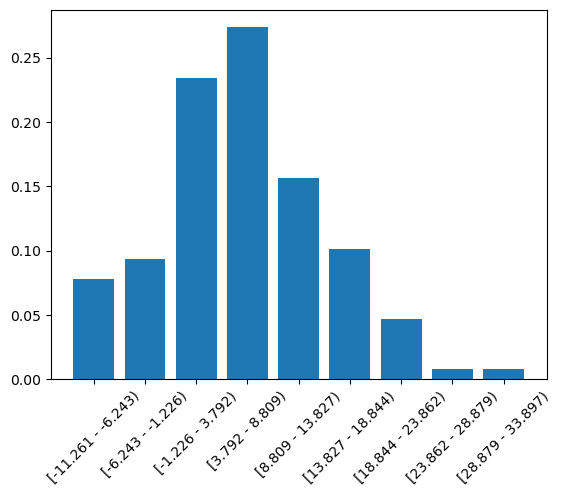

In [24]:
plt.bar([f'[{edges_norm_2[i][0]} - {edges_norm_2[i][1]})' for i in range(len(edges_norm_2))], height = freq_rel_norm_2)
plt.xticks(rotation=45)
plt.show()

## Проверим на нормальность

In [26]:
p = [0]*(m_norm_2+1)

In [27]:
for i in range(m_norm_2+1):
    p[i] = laplace.cdf((edges_norm_2[i][1]-np.mean(norm_dist_2))/np.std(norm_dist_2, ddof = 1)) - \
    laplace.cdf((edges_norm_2[i][0]-np.mean(norm_dist_2))/np.std(norm_dist_2, ddof = 1))

In [28]:
p = np.array(p)
n_teor = p*n_norm_2
print(n_teor)

[ 6.54483404 12.45055825 23.69507306 34.95191057 20.4540237  10.74755132
  5.64962134  2.96858927  1.56048618]


In [29]:
chi2_2 = 0
for i in range(m_norm_2 + 1):
    chi2_2 += (freq_abs_norm_2[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_norm_2 - 2 - 1), chi2_2)
if(chi2.ppf(1-0.05, m_norm_2 - 2 - 1) > chi2_2 and chi2_2 > 0):
    print('Принимаем нулевую гипотезу. Данные распределены нормально')
else:
    print('Отвергаем нулевую гипотезу. Данные не распределены нормально')

11.070497693516351 5.528716848133829
Принимаем нулевую гипотезу. Данные распределены нормально


## Проверим на показательное распределение

In [31]:
p = [0]*(m_norm_2+1)
lamb = 1/np.mean(norm_dist_2)
for i in range(m_norm_2+1):
    p[i] = np.exp(-lamb*edges_norm_2[i][0]) - np.exp(-lamb*edges_norm_2[i][1])
p = np.array(p)
n_teor = p*n_norm_2
print(n_teor, p)

[5.33740304e+02 2.22197434e+02 9.25405609e+01 3.85248688e+01
 1.60447981e+01 6.67948989e+00 2.78186714e+00 1.15809830e+00
 4.82323601e-01] [4.16984613e+00 1.73591746e+00 7.22973132e-01 3.00975538e-01
 1.25349985e-01 5.21835148e-02 2.17333370e-02 9.04764300e-03
 3.76815313e-03]


In [32]:
chi2_1 = 0
for i in range(m_norm_1 + 1):
    chi2_1 += (freq_abs_norm_2[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_norm_2 - 1 - 1), chi2_1)
if(chi2.ppf(1-0.05, m_norm_2 - 1 - 1) > chi2_1 and chi2_1 > 0):
    print('Принимаем нулевую гипотезу. Данные имеют показательное распределение')
else:
    print('Отвергаем нулевую гипотезу. Данные не имеют показательного распределения')

12.591587243743977 766.0403408043195
Отвергаем нулевую гипотезу. Данные не имеют показательного распределения


## Рассмотрим первую выборку из показательной ГС

In [34]:
n_exp_1 = len(exp_dist_1)
m_exp_1 = int(np.round(1+3.332*np.log10(n_exp_1)))
h_exp_1 = (max(exp_dist_1)-min(exp_dist_1))/m_exp_1
print(n_exp_1, m_exp_1, h_exp_1)

32 6 1.616210041120639


In [35]:
edges_exp_1 = [[min(exp_dist_1)-0.01,min(exp_dist_1)-0.01+h_exp_1]]
for i in range(m_exp_1):
    edges_exp_1.append([edges_exp_1[i][1],edges_exp_1[i][1]+h_exp_1])
edges_exp_1 = np.round(np.array(edges_exp_1), 3)
print(edges_exp_1)

[[ 0.017  1.633]
 [ 1.633  3.249]
 [ 3.249  4.866]
 [ 4.866  6.482]
 [ 6.482  8.098]
 [ 8.098  9.714]
 [ 9.714 11.331]]


In [36]:
freq_abs_exp_1 = np.array([0]*(m_exp_1+1))
for i in exp_dist_1:
    for j in range(m_exp_1+1):
        if edges_exp_1[j][0]<=i<=edges_exp_1[j][1]:
            freq_abs_exp_1[j] += 1
freq_rel_exp_1 = np.array(freq_abs_exp_1 / sum(freq_abs_exp_1))
print(freq_abs_exp_1, freq_rel_exp_1)

[14  7  4  4  1  1  1] [0.4375  0.21875 0.125   0.125   0.03125 0.03125 0.03125]


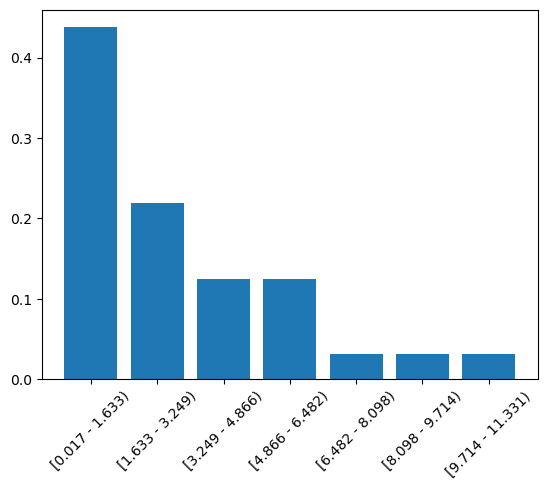

In [37]:
plt.bar([f'[{edges_exp_1[i][0]} - {edges_exp_1[i][1]})' for i in range(len(edges_exp_1))], height = freq_rel_exp_1)
plt.xticks(rotation=45)
plt.show()

## Проверим на нормальность

In [39]:
p = [0]*(m_exp_1+1)

In [40]:
for i in range(m_exp_1+1):
    p[i] = laplace.cdf((edges_exp_1[i][1]-np.mean(exp_dist_1))/np.std(exp_dist_1, ddof = 1)) - \
    laplace.cdf((edges_exp_1[i][0]-np.mean(exp_dist_1))/np.std(exp_dist_1, ddof = 1))

In [41]:
p = np.array(p)
n_teor = p*n_exp_1
print(n_teor)

[4.72540154 8.33903585 6.25174784 3.34929357 1.79583338 0.96289485
 0.51651775]


In [42]:
chi2_1 = 0
for i in range(m_norm_1 + 1):
    chi2_1 += (freq_abs_exp_1[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_exp_1 - 2 - 1), chi2_1)
if(chi2.ppf(1-0.05, m_exp_1 - 2 - 1) > chi2_1 and chi2_1 > 0):
    print('Принимаем нулевую гипотезу. Данные распределены нормально')
else:
    print('Отвергаем нулевую гипотезу. Данные не распределены нормально')

7.814727903251179 20.162492932926096
Отвергаем нулевую гипотезу. Данные не распределены нормально


## Проверим на показательное распределение

In [44]:
p = [0]*(m_exp_1+1)
lamb = 1/np.mean(exp_dist_1)
for i in range(m_exp_1+1):
    p[i] = np.exp(-lamb*edges_exp_1[i][0]) - np.exp(-lamb*edges_exp_1[i][1])
p = np.array(p)
n_teor = p*n_exp_1
print(n_teor, p)

[13.9350635   7.82983922  4.40144564  2.47107374  1.38844793  0.7801417
  0.43854684] [0.43547073 0.24468248 0.13754518 0.07722105 0.043389   0.02437943
 0.01370459]


In [45]:
chi2_1 = 0
for i in range(m_exp_1 + 1):
    chi2_1 += (freq_abs_exp_1[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_exp_1 - 1 - 1), chi2_1)
if(chi2.ppf(1-0.05, m_exp_1 - 1 - 1) > chi2_1 and chi2_1 > 0):
    print('Принимаем нулевую гипотезу. Данные имеют показательное распределение')
else:
    print('Отвергаем нулевую гипотезу. Данные не имеют показательного распределения')

9.487729036781154 1.9603008515192606
Принимаем нулевую гипотезу. Данные имеют показательное распределение


## Рассмотрим вторую выборку из показательной ГС

In [47]:
n_exp_2 = len(exp_dist_2)
m_exp_2 = int(np.round(1+3.332*np.log10(n_exp_2)))
h_exp_2 = (max(exp_dist_2)-min(exp_dist_2))/m_exp_2
print(n_exp_2, m_exp_2, h_exp_2)

128 8 2.1584139170589838


In [48]:
edges_exp_2 = [[min(exp_dist_2)-0.01, min(exp_dist_2)-0.01+h_exp_2]]
for i in range(m_exp_2):
    edges_exp_2.append([edges_exp_2[i][1], edges_exp_2[i][1]+h_exp_2])
edges_exp_2 = np.round(np.array(edges_exp_2), 3)
print(edges_exp_2)

[[ 0.     2.159]
 [ 2.159  4.317]
 [ 4.317  6.476]
 [ 6.476  8.634]
 [ 8.634 10.793]
 [10.793 12.951]
 [12.951 15.109]
 [15.109 17.268]
 [17.268 19.426]]


In [49]:
freq_abs_exp_2 = np.array([0]*(m_exp_2+1))
for i in exp_dist_2:
    for j in range(m_exp_2+1):
        if edges_exp_2[j][0]<=i<=edges_exp_2[j][1]:
            freq_abs_exp_2[j] += 1
freq_rel_exp_2 = np.array(freq_abs_exp_2 / sum(freq_abs_exp_2))
print(freq_abs_exp_2, freq_rel_exp_2)

[85 22 12  6  1  1  0  0  1] [0.6640625 0.171875  0.09375   0.046875  0.0078125 0.0078125 0.
 0.        0.0078125]


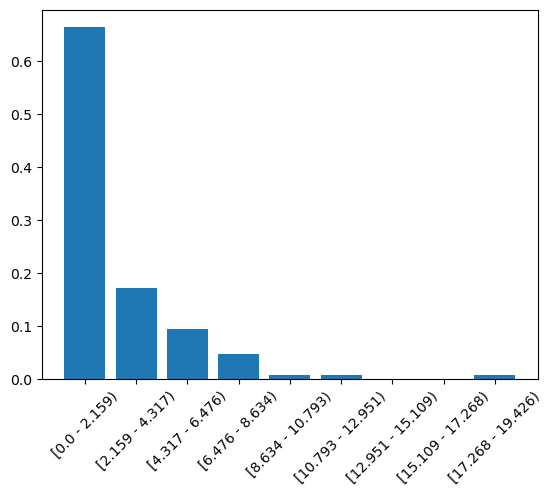

In [50]:
plt.bar([f'[{edges_exp_2[i][0]} - {edges_exp_2[i][1]})' for i in range(len(edges_exp_2))], height = freq_rel_exp_2)
plt.xticks(rotation=45)
plt.show()

## Проверим на нормальность

In [52]:
p = [0]*(m_exp_2+1)

In [53]:
for i in range(m_exp_2+1):
    p[i] = laplace.cdf((edges_exp_2[i][1]-np.mean(exp_dist_2))/np.std(exp_dist_2, ddof = 1)) - \
    laplace.cdf((edges_exp_2[i][0]-np.mean(exp_dist_2))/np.std(exp_dist_2, ddof = 1))

In [54]:
p = np.array(p)
n_teor = p*n_exp_2
print(n_teor)

[36.59338724 36.65976614 15.68745474  6.7063796   2.86978979  1.2268338
  0.5248316   0.22458561  0.09601024]


In [55]:
chi2_2 = 0
for i in range(m_exp_2+1):
    chi2_2 += (freq_abs_exp_2[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_exp_2 - 2 - 1), chi2_2)
if(chi2.ppf(1-0.05, m_exp_2 - 2 - 1) > chi2_2 and chi2_2 > 0):
    print('Принимаем нулевую гипотезу. Данные распределены нормально')
else:
    print('Отвергаем нулевую гипотезу. Данные не распределены нормально')

11.070497693516351 81.35801932080375
Отвергаем нулевую гипотезу. Данные не распределены нормально


## Проверим на показательное распределение

In [57]:
p = [0]*(m_exp_2+1)
lamb = 1/np.mean(exp_dist_2)
for i in range(m_exp_2+1):
    p[i] = np.exp(-lamb*edges_exp_2[i][0]) - np.exp(-lamb*edges_exp_2[i][1])
p = np.array(p)
n_teor = p*n_exp_2
print(n_teor)

[8.08530352e+01 2.97730209e+01 1.09745008e+01 4.04120934e+00
 1.48961220e+00 5.48529254e-01 2.02136374e-01 7.45085893e-02
 2.74367658e-02]


In [58]:
chi2_1 = 0
for i in range(m_exp_2+1):
    chi2_1 += (freq_abs_exp_2[i] - n_teor[i])**2 / n_teor[i]
print(chi2.ppf(1-0.05, m_exp_2 - 1 - 1), chi2_1)
if(chi2.ppf(1-0.05, m_exp_2 - 1 - 1) > chi2_1 and chi2_1 > 0):
    print('Принимаем нулевую гипотезу. Данные имеют показательное распределение')
else:
    print('Отвергаем нулевую гипотезу. Данные не имеют показательного распределения')

12.591587243743977 38.571348234438204
Отвергаем нулевую гипотезу. Данные не имеют показательного распределения


### Мы видим по гистограмме, что распределение — экспоненциальное. Однако критерий согласия Пирсона говорит нам обратное. Получается, мы отвергаем верную нулевую гипотезу, то есть совершаем ошибку первого рода

# Определим виды распределений для данных на основе метода анаморфоз

In [61]:
from sklearn.linear_model import LinearRegression

## Рассмотрим первую выборку из нормальной ГС

## Проверим на нормальность

In [64]:
x_norm_1 = np.square(np.array([(edges_norm_1[i][0]+edges_norm_1[i][1])/2 - np.mean(norm_dist_1) for i in range(m_norm_1+1)]))
y = np.log(freq_rel_norm_1)

In [65]:
model_norm = LinearRegression().fit(x_norm_1[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_norm_1 = model_norm.intercept_
k_norm_1 = model_norm.coef_

b для нормальной анаморфозы = -1.399674232372802
k для нормальной анаморфозы = [-0.00389064]


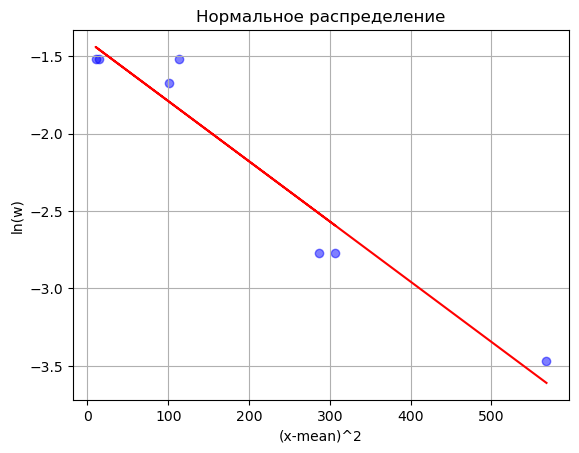

In [66]:
plt.scatter(x_norm_1, y, c='blue', alpha = 0.5)
plt.plot(x_norm_1, b_norm_1 + k_norm_1 * x_norm_1, c='red')
plt.title('Нормальное распределение')
plt.xlabel('(x-mean)^2')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [67]:
print(f'R2 для нормальной анаморфозы = {model_norm.score(x_norm_1[:, np.newaxis], y)}')

R2 для нормальной анаморфозы = 0.9373997921841375


In [68]:
print('Коэффициент детерминации > 0.8 значит нулевая гипотеза принимается, данные имеют нормальное распределение')

Коэффициент детерминации > 0.8 значит нулевая гипотеза принимается, данные имеют нормальное распределение


## Проверим на экспоненциальное распределение

In [70]:
x_exp_1 = np.array([(edges_norm_1[i][0]+edges_norm_1[i][1])/2 for i in range(m_norm_1+1)])
y = np.log(freq_rel_norm_1)

In [71]:
model_norm = LinearRegression().fit(x_exp_1[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_exp_1 = model_norm.intercept_
k_exp_1 = model_norm.coef_

b для нормальной анаморфозы = -2.376813032023198
k для нормальной анаморфозы = [-0.02455868]


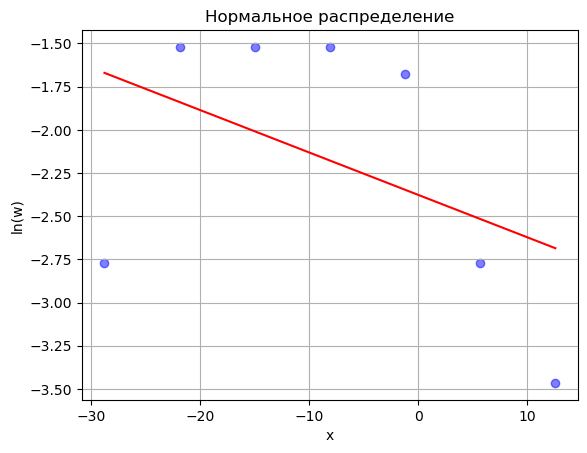

In [72]:
plt.scatter(x_exp_1, y, c='blue', alpha = 0.5)
plt.plot(x_exp_1, b_exp_1 + k_exp_1 * x_exp_1, c='red')
plt.title('Нормальное распределение')
plt.xlabel('x')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [73]:
print(f'R2 для экспоненциальной анаморфозы = {model_norm.score(x_exp_1[:, np.newaxis], y)}')

R2 для экспоненциальной анаморфозы = 0.20468285500600925


In [74]:
print('Коэффициент детерминации < 0.8 значит нулевая гипотеза неверна, данные не имеют экспоненциальное распределение')

Коэффициент детерминации < 0.8 значит нулевая гипотеза неверна, данные не имеют экспоненциальное распределение


In [75]:
print(f'Стандартное отклонение найдём из угла наклона прямой анаморфозы: {np.sqrt(-1/(2*k_norm_1))}')

Стандартное отклонение найдём из угла наклона прямой анаморфозы: [11.33638724]


## Рассмотрим вторую выборку из нормальной ГС

## Проверим на нормальность

In [78]:
x_norm_2 = np.square(np.array([(edges_norm_2[i][0]+edges_norm_2[i][1])/2 - np.mean(norm_dist_2) for i in range(m_norm_2+1)]))
y = np.log(freq_rel_norm_2)

In [79]:
model_norm = LinearRegression().fit(x_norm_2[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_norm_2 = model_norm.intercept_
k_norm_2 = model_norm.coef_

b для нормальной анаморфозы = -1.585284788497847
k для нормальной анаморфозы = [-0.00575057]


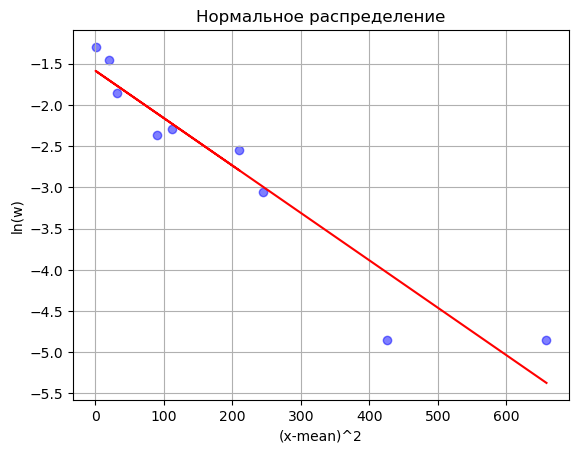

In [80]:
plt.scatter(x_norm_2, y, c='blue', alpha = 0.5)
plt.plot(x_norm_2, b_norm_2 + k_norm_2 * x_norm_2, c='red')
plt.title('Нормальное распределение')
plt.xlabel('(x-mean)^2')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [81]:
print(f'R2 для нормальной анаморфозы = {model_norm.score(x_norm_2[:, np.newaxis], y)}')

R2 для нормальной анаморфозы = 0.9118298853655613


In [82]:
print('Коэффициент детерминации > 0.8 значит нулевая гипотеза принимается, данные имеют нормальное распределение')

Коэффициент детерминации > 0.8 значит нулевая гипотеза принимается, данные имеют нормальное распределение


## Проверим на экспоненциальное распределение

In [84]:
x_exp_2 = np.array([(edges_norm_2[i][0]+edges_norm_2[i][1])/2 for i in range(m_norm_2+1)])
y = np.log(freq_rel_norm_2)

In [85]:
model_norm = LinearRegression().fit(x_exp_2[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_exp_2 = model_norm.intercept_
k_exp_2 = model_norm.coef_

b для нормальной анаморфозы = -1.9454269737432301
k для нормальной анаморфозы = [-0.06933843]


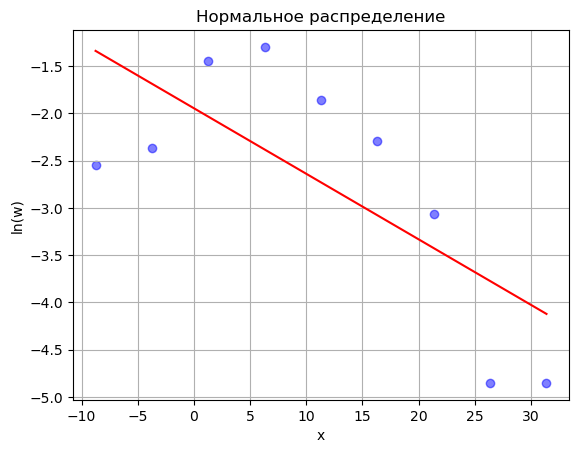

In [86]:
plt.scatter(x_exp_2, y, c='blue', alpha = 0.5)
plt.plot(x_exp_2, b_exp_2 + k_exp_2 * x_exp_2, c='red')
plt.title('Нормальное распределение')
plt.xlabel('x')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [87]:
print(f'R2 для экспоненциальной анаморфозы = {model_norm.score(x_exp_2[:, np.newaxis], y)}')

R2 для экспоненциальной анаморфозы = 0.5213578384676938


In [88]:
print('Коэффициент детерминации < 0.8 значит нулевая гипотеза неверна, данные не имеют экспоненциальное распределение')

Коэффициент детерминации < 0.8 значит нулевая гипотеза неверна, данные не имеют экспоненциальное распределение


In [89]:
print(f'Стандартное отклонение найдём из угла наклона прямой анаморфозы: {np.sqrt(-1/(2*k_norm_2))}')

Стандартное отклонение найдём из угла наклона прямой анаморфозы: [9.32458909]


## Рассмотрим первую выборку из экспоненциальной ГС

In [91]:
x_norm_3 = np.square(np.array([(edges_exp_1[i][0]+edges_exp_1[i][1])/2 - np.mean(exp_dist_1) for i in range(m_exp_1+1)]))
y = np.log(freq_rel_exp_1)

In [92]:
model_norm = LinearRegression().fit(x_norm_3[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_norm_3 = model_norm.intercept_
k_norm_3 = model_norm.coef_

b для нормальной анаморфозы = -1.7049339821017844
k для нормальной анаморфозы = [-0.03797661]


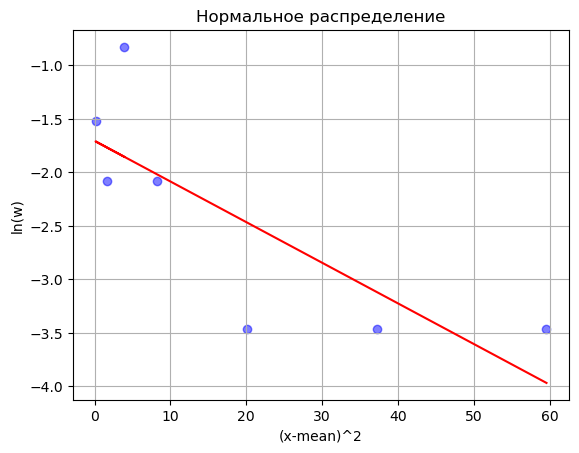

In [93]:
plt.scatter(x_norm_3, y, c='blue', alpha = 0.5)
plt.plot(x_norm_3, b_norm_3 + k_norm_3 * x_norm_3, c='red')
plt.title('Нормальное распределение')
plt.xlabel('(x-mean)^2')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [94]:
print(f'R2 для нормальной анаморфозы = {model_norm.score(x_norm_3[:, np.newaxis], y)}')

R2 для нормальной анаморфозы = 0.6271591489977137


In [95]:
print('Коэффициент детерминации < 0.8 значит нулевая гипотеза отвергается, данные не имеют нормального распределения')

Коэффициент детерминации < 0.8 значит нулевая гипотеза отвергается, данные не имеют нормального распределения


## Проверим на экспоненциальное распределение

In [97]:
x_exp_3 = np.array([(edges_exp_1[i][0]+edges_exp_1[i][1])/2 for i in range(m_exp_1+1)])
y = np.log(freq_rel_exp_1)

In [98]:
model_norm = LinearRegression().fit(x_exp_3[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_exp_3 = model_norm.intercept_
k_exp_3 = model_norm.coef_

b для нормальной анаморфозы = -0.7603452121671832
k для нормальной анаморфозы = [-0.29157465]


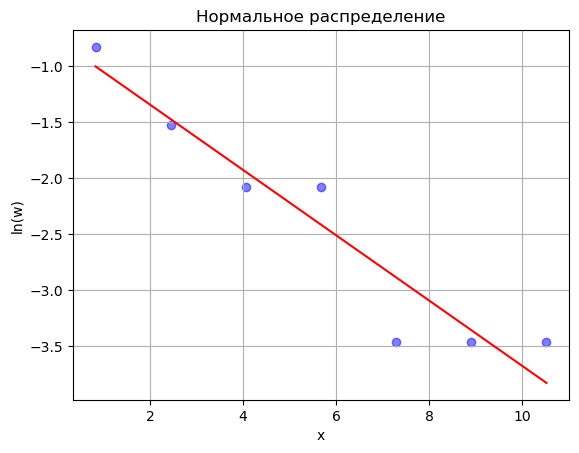

In [99]:
plt.scatter(x_exp_3, y, c='blue', alpha = 0.5)
plt.plot(x_exp_3, b_exp_3 + k_exp_3 * x_exp_3, c='red')
plt.title('Нормальное распределение')
plt.xlabel('x')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [100]:
print(f'R2 для экспоненциальной анаморфозы = {model_norm.score(x_exp_3[:, np.newaxis], y)}')

R2 для экспоненциальной анаморфозы = 0.9062739338641422


In [101]:
print('Коэффициент детерминации > 0.8 значит нулевая гипотеза верна, данные имеют экспоненциальное распределение')

Коэффициент детерминации > 0.8 значит нулевая гипотеза верна, данные имеют экспоненциальное распределение


In [102]:
print(f'Параметр лямбда найдём из угла наклона кривой: {-k_exp_3}')

Параметр лямбда найдём из угла наклона кривой: [0.29157465]


## Рассмотрим вторую выборку из экспоненциальной ГС

## Проверим на нормальность

In [105]:
x_norm_4 = np.square(np.array([(edges_exp_2[i][0]+edges_exp_2[i][1])/2 - np.mean(exp_dist_2) for i in range(m_exp_2-2)]))
y = np.log(freq_rel_exp_2[:-3])
print(y)

[-0.40937901 -1.76098781 -2.36712361 -3.06027079 -4.85203026 -4.85203026]


In [106]:
model_norm = LinearRegression().fit(x_norm_4[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_norm_4 = model_norm.intercept_
k_norm_4 = model_norm.coef_

b для нормальной анаморфозы = -1.510525379731227
k для нормальной анаморфозы = [-0.0426428]


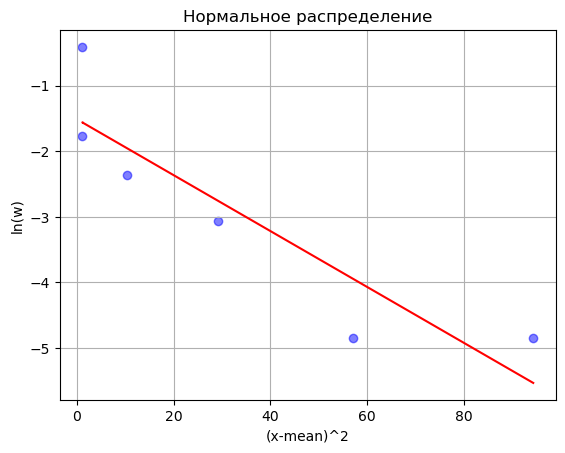

In [107]:
plt.scatter(x_norm_4, y, c='blue', alpha = 0.5)
plt.plot(x_norm_4, b_norm_4 + k_norm_4 * x_norm_4, c='red')
plt.title('Нормальное распределение')
plt.xlabel('(x-mean)^2')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [108]:
print(f'R2 для нормальной анаморфозы = {model_norm.score(x_norm_4[:, np.newaxis], y)}')

R2 для нормальной анаморфозы = 0.8108593040153564


In [109]:
print('Коэффициент детерминации > 0.8 значит нулевая гипотеза верна, данные имеют нормального распределения')

Коэффициент детерминации > 0.8 значит нулевая гипотеза верна, данные имеют нормального распределения


### Мы знаем из гистограммы на предыдущем шаге, что данные имеют экспоненциальное распределение. Значит нулевая гипотеза о том, что данные имеют нормальное распределение неверна, но мы её приняли. То есть отвергли верную альтернативную гипотезу, значит была совершена ошибка второго рода

## Проверим на экспоненциальное распределение

In [112]:
x_exp_4 = np.array([(edges_exp_2[i][0]+edges_exp_2[i][1])/2 for i in range(m_exp_2-2)])
y = np.log(freq_rel_exp_2[:-3])

In [113]:
model_norm = LinearRegression().fit(x_exp_4[:, np.newaxis], y)
print(f'b для нормальной анаморфозы = {model_norm.intercept_}')
print(f'k для нормальной анаморфозы = {model_norm.coef_}')
b_exp_4 = model_norm.intercept_
k_exp_4 = model_norm.coef_

b для нормальной анаморфозы = -0.12528497224491275
k для нормальной анаморфозы = [-0.42595097]


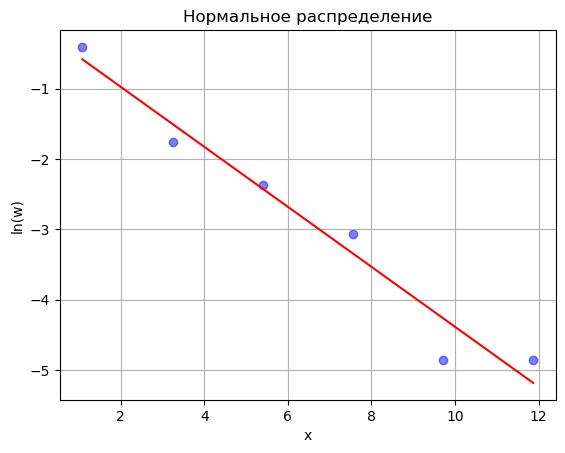

In [114]:
plt.scatter(x_exp_4, y, c='blue', alpha = 0.5)
plt.plot(x_exp_4, b_exp_4 + k_exp_4 * x_exp_4, c='red')
plt.title('Нормальное распределение')
plt.xlabel('x')
plt.ylabel('ln(w)')
plt.grid()
plt.show()

In [115]:
print(f'R2 для экспоненциальной анаморфозы = {model_norm.score(x_exp_4[:, np.newaxis], y)}')

R2 для экспоненциальной анаморфозы = 0.9587639076257938


In [116]:
print('Коэффициент детерминации > 0.8 значит нулевая гипотеза верна, данные имеют экспоненциальное распределение')

Коэффициент детерминации > 0.8 значит нулевая гипотеза верна, данные имеют экспоненциальное распределение


In [117]:
print(f'Параметр лямбда найдём из угла наклона кривой: {-k_exp_4}')

Параметр лямбда найдём из угла наклона кривой: [0.42595097]
